# Forecast from two different initial conditions 

Let's fix the two initial condition  for its simplicity. <br>
1. 2025/07/01
2. 2025/07/02

In this notebook, two forecast generated from two initial conditions above will be investigated. <br>
The propagation of the difference between them (anomalie) is expected to be observable by GLONET forecast model.


## Prerequisite

In [2]:
import sys, os

src_path = os.path.abspath(os.path.join(os.getcwd(), "../glonet_daily_forecast_data_orchestration/src"))
if src_path not in sys.path:
    sys.path.insert(0, src_path)

from get_inits import generate_initial_data
from glonet_forecast import create_forecast
from model import synchronize_model_locally
from s3_upload import save_bytes_to_s3

/home/onyxia/miniforge3/envs/glon/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Fixed input and variables

In [3]:
EDITO_BUCKET_NAME="project-da-ml"
INPUT_URL_1="https://minio.dive.edito.eu/project-glonet/public/glonet_1_4_daily_forecast/2025-07-01/GLONET_MOI_2025-07-02_2025-07-11.nc"
INPUT_URL_2="https://minio.dive.edito.eu/project-glonet/public/glonet_1_4_daily_forecast/2025-07-02/GLONET_MOI_2025-07-03_2025-07-12.nc"

In [4]:
import torch

print("PyTorch version:      ", torch.__version__)
print("CUDA available:       ", torch.cuda.is_available())
print("CUDA version (build): ", torch.version.cuda)
print("cuDNN version:        ", torch.backends.cudnn.version())


PyTorch version:       2.7.1+cu126
CUDA available:        True
CUDA version (build):  12.6
cuDNN version:         90501


## Forecast

Two initial NetCDF are given to the algorithm.

In [5]:
cif1, cif2, cif3 = generate_initial_data(bucket_name=EDITO_BUCKET_NAME, 
                                        forecast_netcdf_file_url=INPUT_URL_1)
cif4, cif5, cif6 = generate_initial_data(bucket_name=EDITO_BUCKET_NAME, 
                                        forecast_netcdf_file_url=INPUT_URL_2)

Initial file already exists: https://minio.dive.edito.eu/project-glonet/public/glonet_1_4_daily_forecast/2025-07-01/inits/in1.nc
Initial file already exists: https://minio.dive.edito.eu/project-glonet/public/glonet_1_4_daily_forecast/2025-07-01/inits/in2.nc
Initial file already exists: https://minio.dive.edito.eu/project-glonet/public/glonet_1_4_daily_forecast/2025-07-01/inits/in3.nc
Initial file already exists: https://minio.dive.edito.eu/project-glonet/public/glonet_1_4_daily_forecast/2025-07-02/inits/in1.nc
Initial file already exists: https://minio.dive.edito.eu/project-glonet/public/glonet_1_4_daily_forecast/2025-07-02/inits/in2.nc
Initial file already exists: https://minio.dive.edito.eu/project-glonet/public/glonet_1_4_daily_forecast/2025-07-02/inits/in3.nc


Before forecasting confirm that your model is well synchronized

In [6]:
local_dir = "../TrainedWeights"
synchronize_model_locally(local_dir=local_dir)

Syncing project-glonet/glonet_1_4_model/20241112/model/ in ../TrainedWeights...


ClientError: An error occurred (InvalidAccessKeyId) when calling the ListObjectsV2 operation: The Access Key Id you provided does not exist in our records.

Make two different forecast from two different input.

In [14]:
forecast_1 = create_forecast(forecast_netcdf_file_url=INPUT_URL_1,
                                model_dir=local_dir, 
                                initial_file_1_url=cif1, 
                                initial_file_2_url=cif2, 
                                initial_file_3_url=cif3)

forecast_2 = create_forecast(forecast_netcdf_file_url=INPUT_URL_2,
                                model_dir=local_dir, 
                                initial_file_1_url=cif4, 
                                initial_file_2_url=cif5, 
                                initial_file_3_url=cif6)

Creating 2025-07-01 forecast from 2025-06-30 to 2025-07-01...
1


/home/onyxia/work/glonet/glonet_daily_forecast_data_orchestration/src/glonet_forecast.py:102: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


2


/home/onyxia/work/glonet/glonet_daily_forecast_data_orchestration/src/glonet_forecast.py:102: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


3


/home/onyxia/work/glonet/glonet_daily_forecast_data_orchestration/src/glonet_forecast.py:102: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


4


/home/onyxia/work/glonet/glonet_daily_forecast_data_orchestration/src/glonet_forecast.py:102: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


5


/home/onyxia/work/glonet/glonet_daily_forecast_data_orchestration/src/glonet_forecast.py:102: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


1


/home/onyxia/work/glonet/glonet_daily_forecast_data_orchestration/src/glonet_forecast.py:156: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


2


/home/onyxia/work/glonet/glonet_daily_forecast_data_orchestration/src/glonet_forecast.py:156: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


3


/home/onyxia/work/glonet/glonet_daily_forecast_data_orchestration/src/glonet_forecast.py:156: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


4


/home/onyxia/work/glonet/glonet_daily_forecast_data_orchestration/src/glonet_forecast.py:156: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


5


/home/onyxia/work/glonet/glonet_daily_forecast_data_orchestration/src/glonet_forecast.py:156: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


1


/home/onyxia/work/glonet/glonet_daily_forecast_data_orchestration/src/glonet_forecast.py:208: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


2


/home/onyxia/work/glonet/glonet_daily_forecast_data_orchestration/src/glonet_forecast.py:208: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


3


/home/onyxia/work/glonet/glonet_daily_forecast_data_orchestration/src/glonet_forecast.py:208: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


4


/home/onyxia/work/glonet/glonet_daily_forecast_data_orchestration/src/glonet_forecast.py:208: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


5


/home/onyxia/work/glonet/glonet_daily_forecast_data_orchestration/src/glonet_forecast.py:208: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Time to get-process data: 0.3588 seconds
Time taken by for 10 days on cpu: 484.1148 seconds
Creating 2025-07-02 forecast from 2025-07-01 to 2025-07-02...
1


/home/onyxia/work/glonet/glonet_daily_forecast_data_orchestration/src/glonet_forecast.py:102: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


2


/home/onyxia/work/glonet/glonet_daily_forecast_data_orchestration/src/glonet_forecast.py:102: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


3


/home/onyxia/work/glonet/glonet_daily_forecast_data_orchestration/src/glonet_forecast.py:102: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


4


/home/onyxia/work/glonet/glonet_daily_forecast_data_orchestration/src/glonet_forecast.py:102: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


5


/home/onyxia/work/glonet/glonet_daily_forecast_data_orchestration/src/glonet_forecast.py:102: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


1


/home/onyxia/work/glonet/glonet_daily_forecast_data_orchestration/src/glonet_forecast.py:156: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


2


/home/onyxia/work/glonet/glonet_daily_forecast_data_orchestration/src/glonet_forecast.py:156: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


3


/home/onyxia/work/glonet/glonet_daily_forecast_data_orchestration/src/glonet_forecast.py:156: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


4


/home/onyxia/work/glonet/glonet_daily_forecast_data_orchestration/src/glonet_forecast.py:156: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


5


/home/onyxia/work/glonet/glonet_daily_forecast_data_orchestration/src/glonet_forecast.py:156: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


1


/home/onyxia/work/glonet/glonet_daily_forecast_data_orchestration/src/glonet_forecast.py:208: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


2


/home/onyxia/work/glonet/glonet_daily_forecast_data_orchestration/src/glonet_forecast.py:208: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


3


/home/onyxia/work/glonet/glonet_daily_forecast_data_orchestration/src/glonet_forecast.py:208: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


4


/home/onyxia/work/glonet/glonet_daily_forecast_data_orchestration/src/glonet_forecast.py:208: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


5


/home/onyxia/work/glonet/glonet_daily_forecast_data_orchestration/src/glonet_forecast.py:208: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Time to get-process data: 0.2830 seconds
Time taken by for 10 days on cpu: 469.0991 seconds


## Visualization
There are too many cases to plot every windows.. let's simplify the code. <br>
What is the state which you interest in ? <br>
(Simply choose one state and uncomment it for investigate)

In [15]:
state = 'zos'
# state = 'thetao'
# state = 'so'
# state = 'uo'
# state = 'vo'



For better visualization, different color map is chosen for each state.

In [16]:
match state :
    case "zos" :
        cmap_param = "seismic"
    case "thetao" :
        cmap_param = "viridis"
    case "so" :
        cmap_param = "jet"
    case "uo" :
        cmap_param = "coolwarm"
    case "vo" :
        cmap_param = "coolwarm"

### Overview of the two forecast output

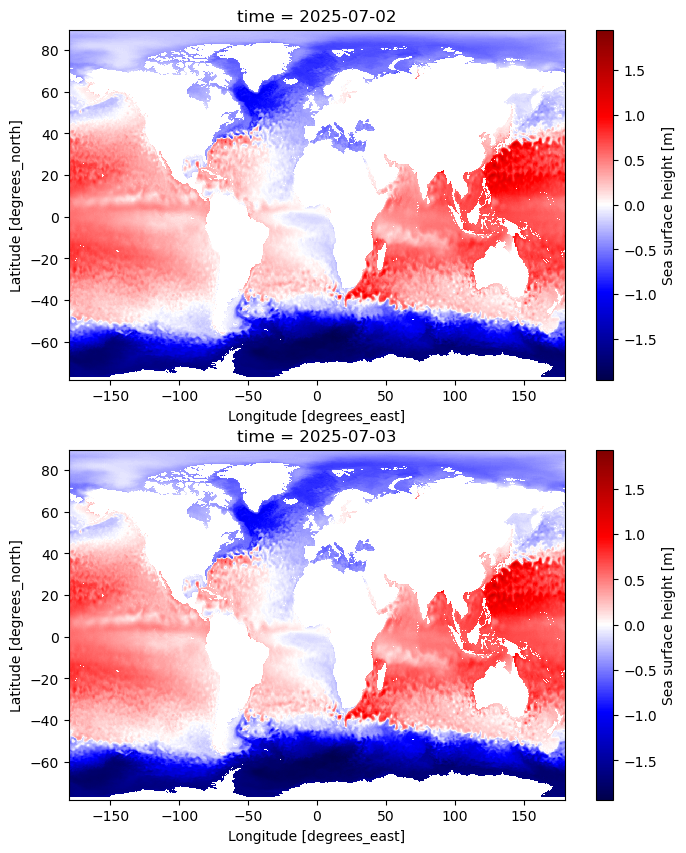

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 10))

plt.subplot(2, 1, 1)
state_window1 = forecast_1[state][0] # 0 is for nextday forecast. GLONET generate 10 day forecasting and make NetCDF file with time coordinates; 0 => nextday, ..., 9 => 10-day forecast 
state_window1.plot(cmap=cmap_param)

plt.subplot(2, 1, 2)
state_window2 = forecast_2[state][0]
state_window2.plot(cmap=cmap_param)


### Investigate more precisely
- Zone#1 : South Africa Agulhas Current
- Zone#2 : East America Gulf Stream
- Zone#3 : East Asia Kuroshio Current

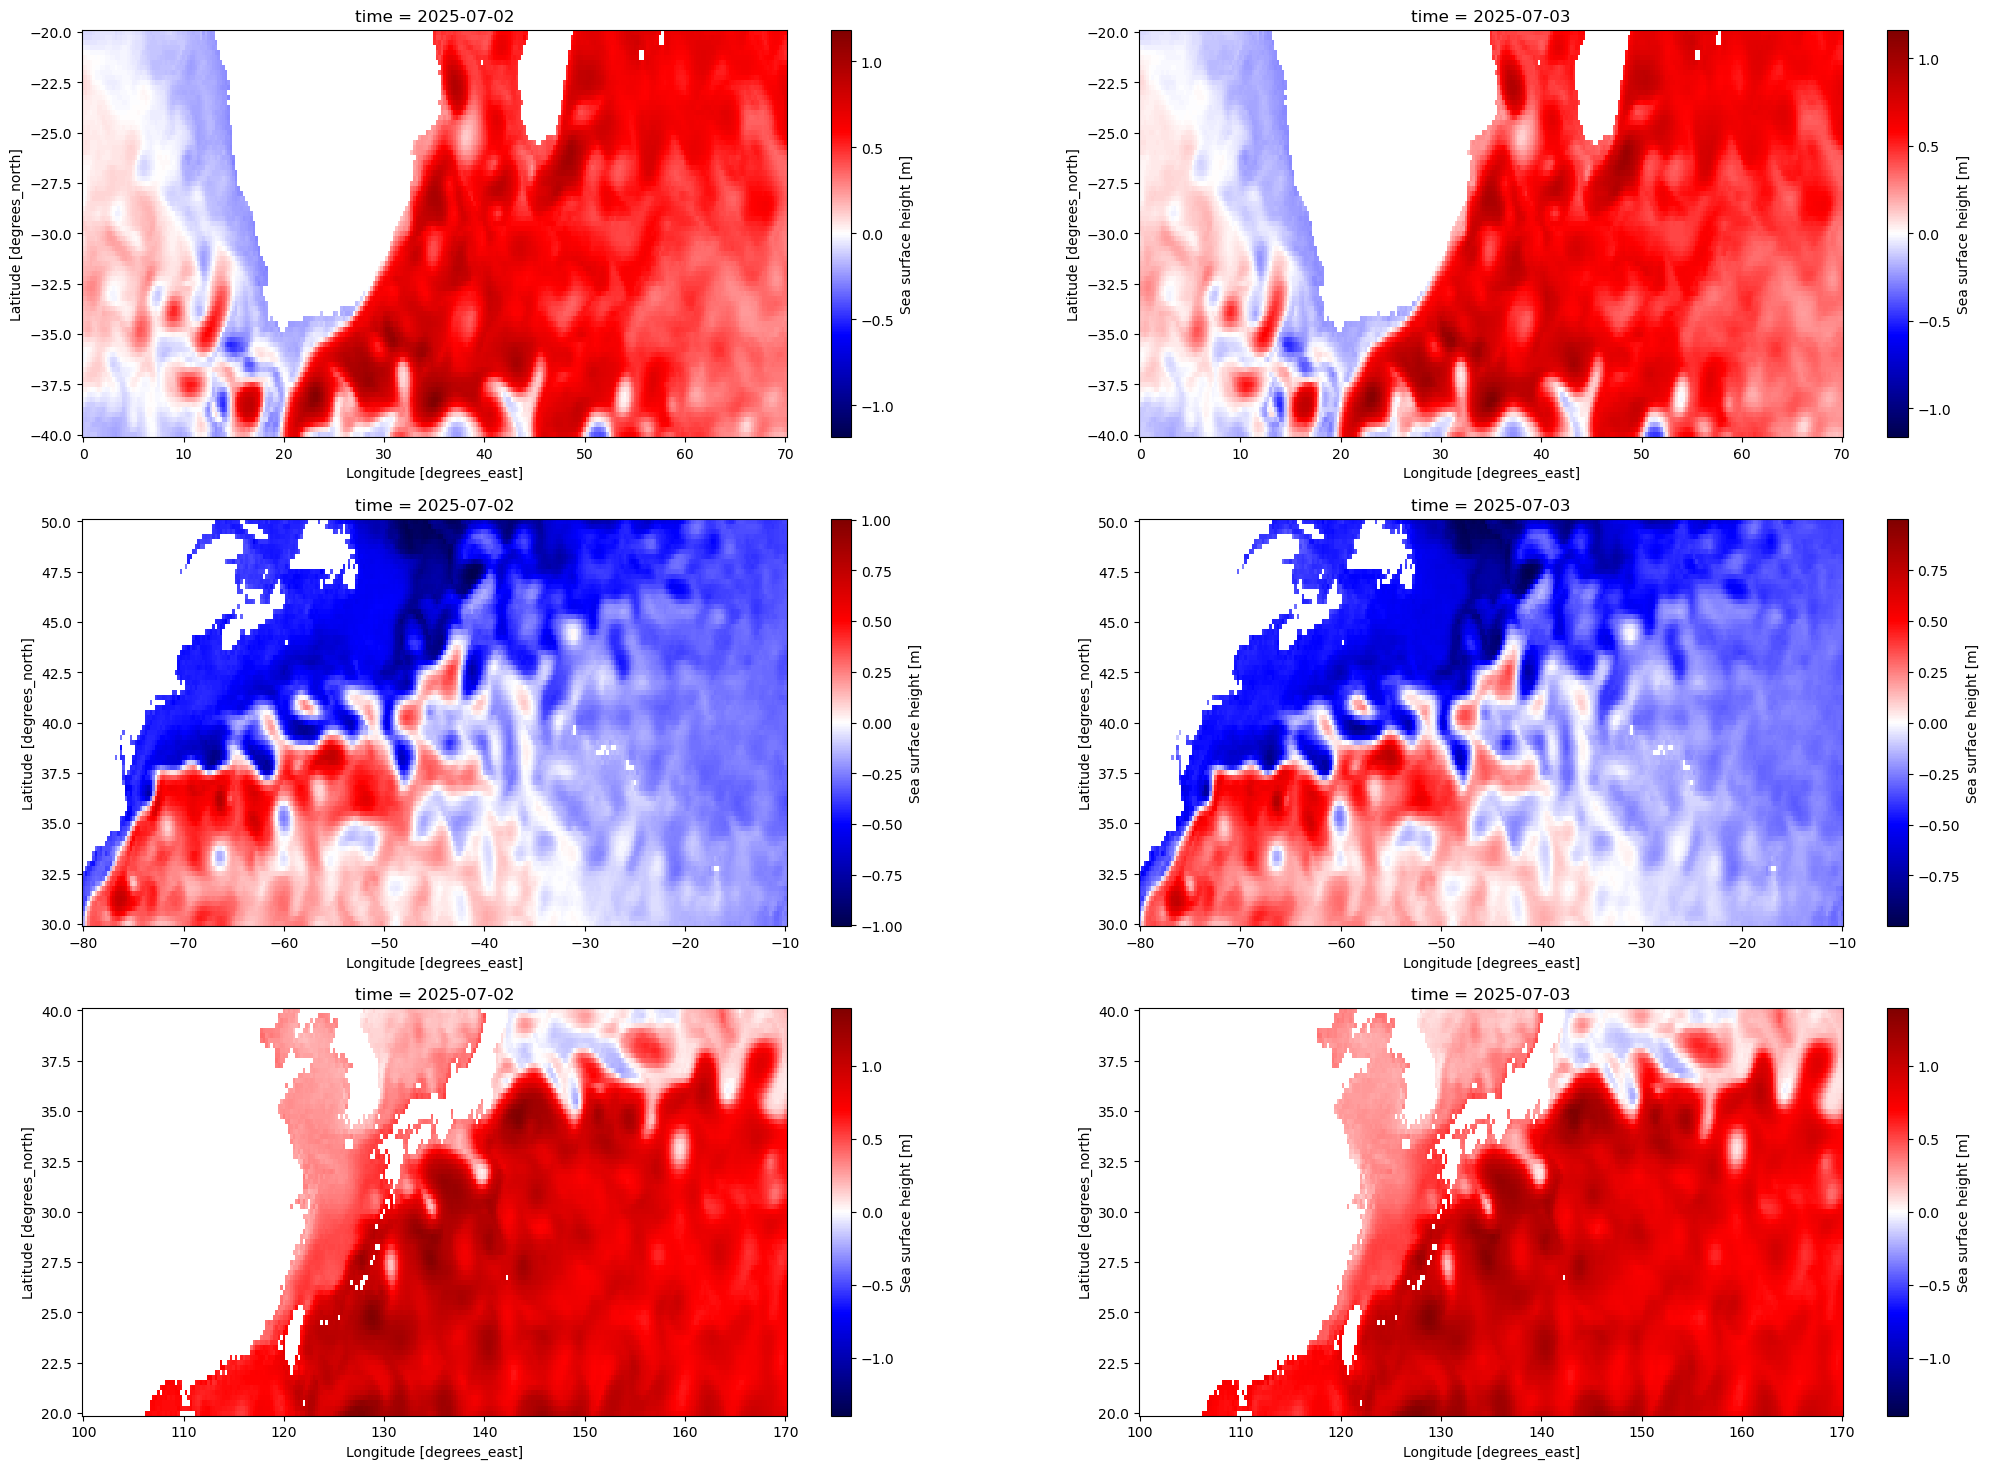

In [20]:
# Define the zoom region (latitude and longitude bounds)
lat_min1, lat_max1, lat_min2, lat_max2, lat_min3, lat_max3 = -40, -20, 30 , 50, 20, 40
lon_min1, lon_max1, lon_min2, lon_max2, lon_min3, lon_max3 = 0, 70, -80, -10, 100, 170

zone1_forecast1 = state_window1.sel(latitude=slice(lat_min1, lat_max1), longitude=slice(lon_min1, lon_max1))
zone2_forecast1 = state_window1.sel(latitude=slice(lat_min2, lat_max2), longitude=slice(lon_min2, lon_max2))
zone3_forecast1 = state_window1.sel(latitude=slice(lat_min3, lat_max3), longitude=slice(lon_min3, lon_max3))

zone1_forecast2 = state_window2.sel(latitude=slice(lat_min1, lat_max1), longitude=slice(lon_min1, lon_max1))
zone2_forecast2 = state_window2.sel(latitude=slice(lat_min2, lat_max2), longitude=slice(lon_min2, lon_max2))
zone3_forecast2 = state_window2.sel(latitude=slice(lat_min3, lat_max3), longitude=slice(lon_min3, lon_max3))

# Define the size of subplot
plt.figure(figsize=(25, 18))

# Plot
plt.subplot(3, 2 ,1)
zone1_forecast1.plot(cmap=cmap_param)
plt.subplot(3, 2, 2)
zone1_forecast2.plot(cmap=cmap_param)

plt.subplot(3, 2 ,3)
zone2_forecast1.plot(cmap=cmap_param)
plt.subplot(3, 2, 4)
zone2_forecast2.plot(cmap=cmap_param)

plt.subplot(3, 2 ,5)
zone3_forecast1.plot(cmap=cmap_param)
plt.subplot(3, 2, 6)
zone3_forecast2.plot(cmap=cmap_param)

In order to see the difference more clearly, let's plot `forecast1 - forecast2`. <br>
Left side of the plot is the difference between input. In the other hand, the difference of the output is plotted on the right.
This illustrate how the difference (anomalie) propagate along with the GLONET on one-day forecast. 

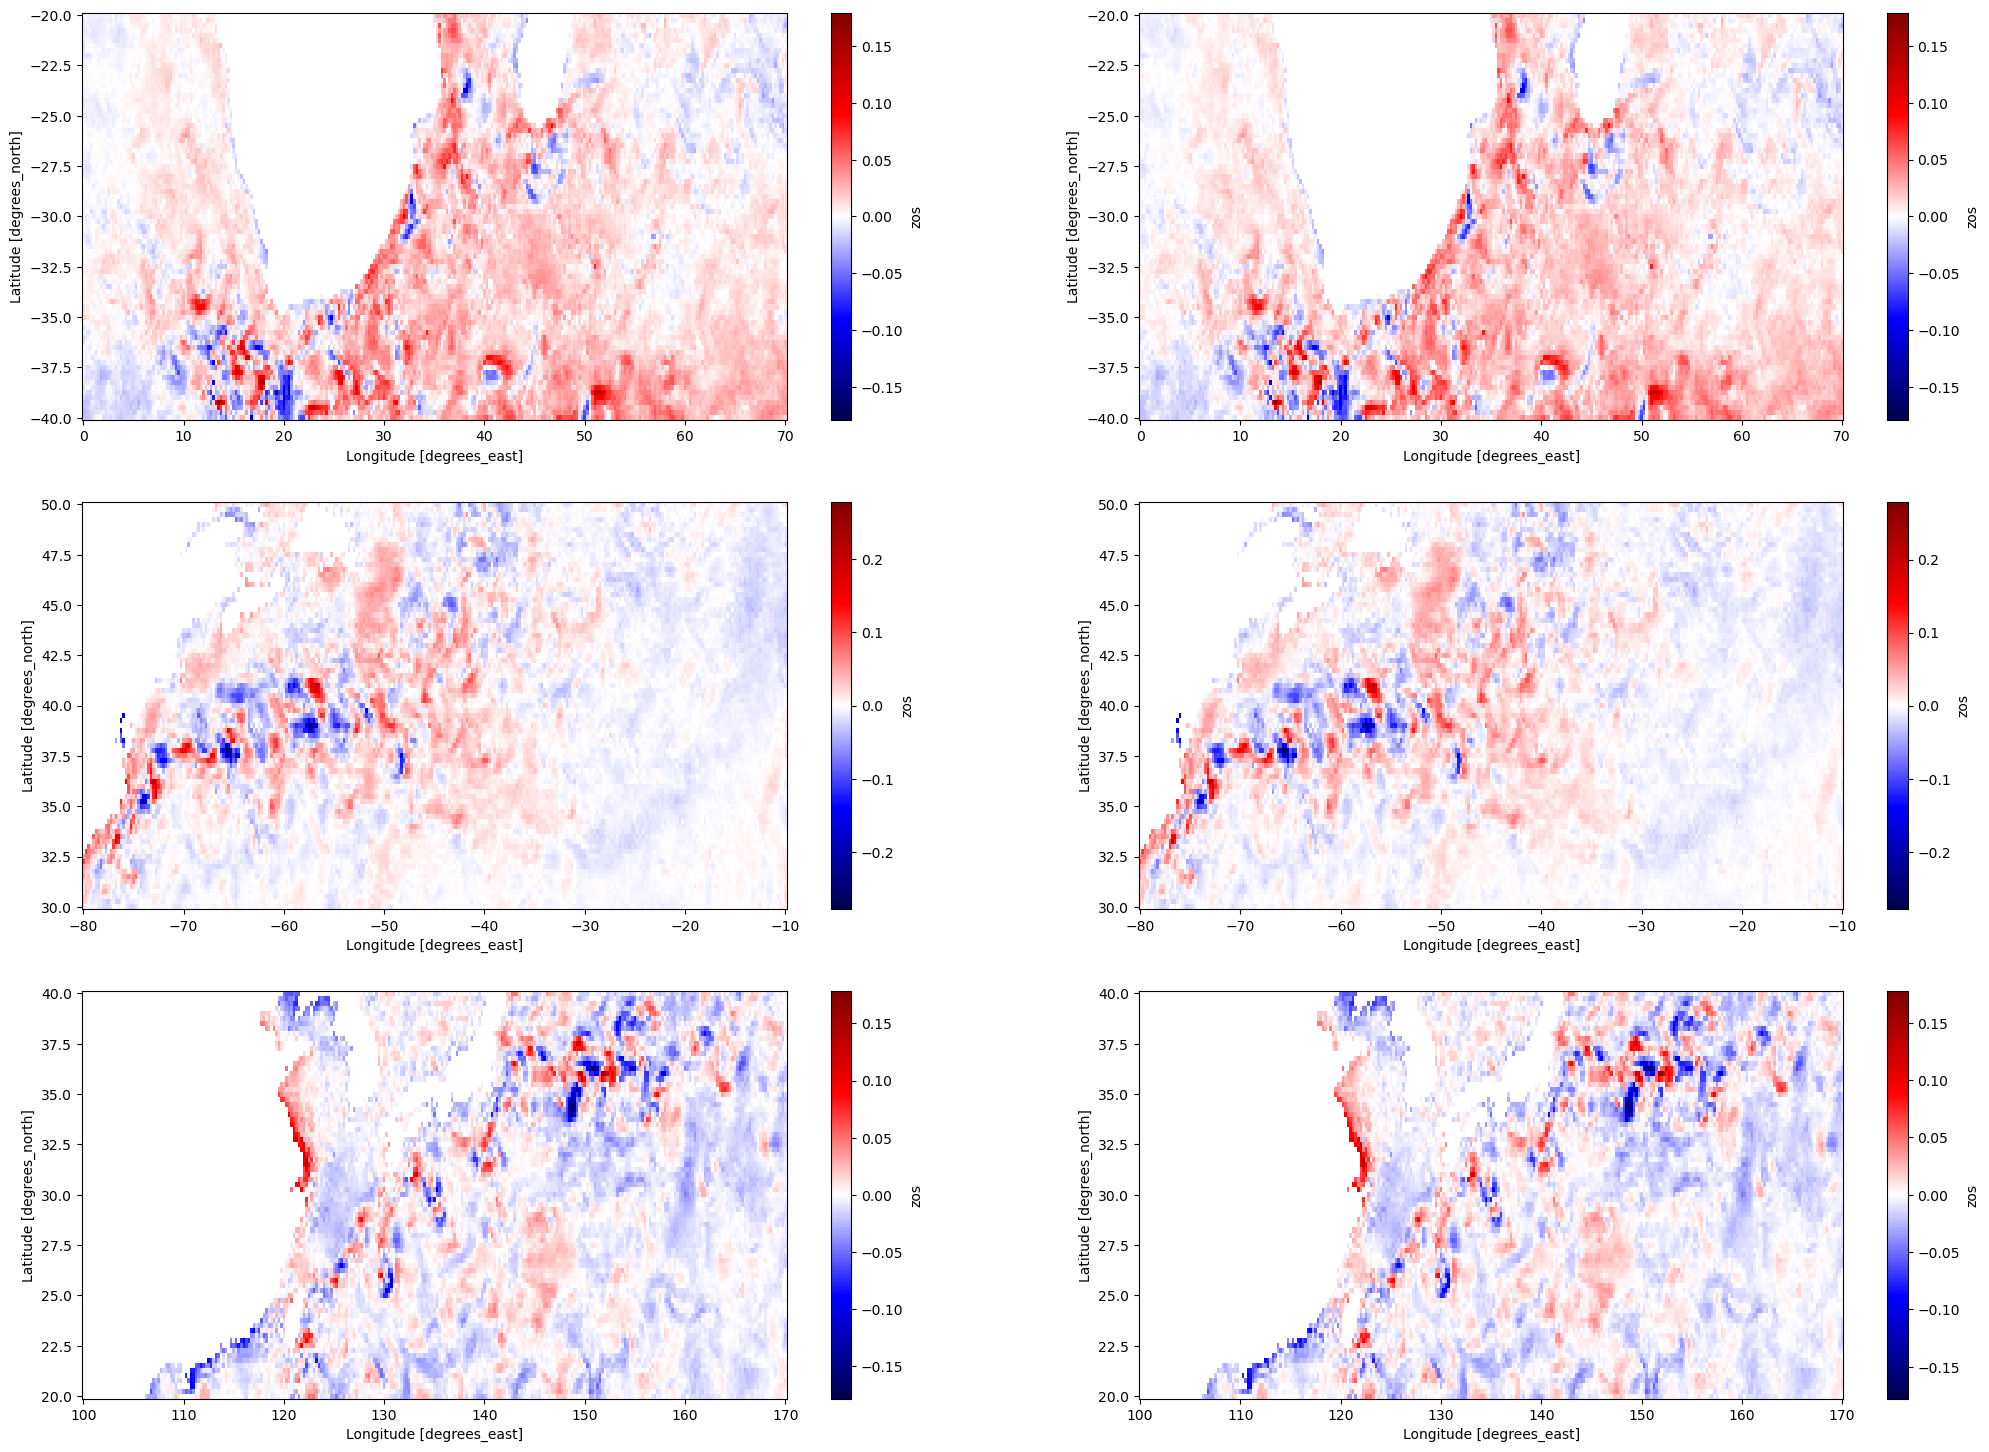

In [42]:
import xarray as xr

input_nc1 = xr.open_dataset(f"{INPUT_URL_1}#mode=bytes", engine="netcdf4")[state].isel(time=0)
input_nc2 = xr.open_dataset(f"{INPUT_URL_2}#mode=bytes", engine="netcdf4")[state].isel(time=0)

zone1_input1 = input_nc1.sel(latitude=slice(lat_min1, lat_max1), longitude=slice(lon_min1, lon_max1))
zone2_input1 = input_nc1.sel(latitude=slice(lat_min2, lat_max2), longitude=slice(lon_min2, lon_max2))
zone3_input1 = input_nc1.sel(latitude=slice(lat_min3, lat_max3), longitude=slice(lon_min3, lon_max3))

zone1_input2 = input_nc2.sel(latitude=slice(lat_min1, lat_max1), longitude=slice(lon_min1, lon_max1))
zone2_input2 = input_nc2.sel(latitude=slice(lat_min2, lat_max2), longitude=slice(lon_min2, lon_max2))
zone3_input2 = input_nc2.sel(latitude=slice(lat_min3, lat_max3), longitude=slice(lon_min3, lon_max3))

# Define the size of subplot
plt.figure(figsize=(25, 18))

# Plot
plt.subplot(3, 2 ,1)
(zone1_input1 - zone1_input2).plot(cmap=cmap_param)
plt.subplot(3, 2, 2)
(zone1_forecast1 - zone1_forecast2).plot(cmap=cmap_param)

plt.subplot(3, 2 ,3)
(zone2_input1 - zone2_input2).plot(cmap=cmap_param)
plt.subplot(3, 2, 4)
(zone2_forecast1 - zone2_forecast2).plot(cmap=cmap_param)

plt.subplot(3, 2 ,5)
(zone3_input1 - zone3_input2).plot(cmap=cmap_param)
plt.subplot(3, 2, 6)
(zone3_forecast1 - zone3_forecast2).plot(cmap=cmap_param)